# calculate betweenness centrality


In [1]:
import pandas as pd
import numpy as np
import csv
import ast
import matplotlib.pyplot as plt
import bct

In [31]:
pip install networkx

  Using cached networkx-3.1-py3-none-any.whl (2.1 MB)
Note: you may need to restart the kernel to use updated packages.


In [32]:
import networkx as nx

In [2]:
gs_csv = "gs_outputs/gs_authorlist_updated1.csv"
scival_csv = "scival_outputs/sv_authorlist_publications_updated2.csv"

combined_df = pd.read_csv("authors_comparisons_updated1.csv")

In [3]:
gs_df = pd.read_csv(gs_csv)
scival_df = pd.read_csv(scival_csv)

In [4]:
def get_networkx_matrix(graph_obj, df, name_str, coauthor_str):
    ''' 
    PARAMS:
    df: dataframe with at minimum columns containing author names and coauthor dictionary
    name_str: string of author column name in df
    coauthor_str: string of coauthor column name in df

    RETURN:
    coauthor_matrix: graph object with number of shared co-authored publications
    '''
    # names = df.loc[:,name_str]
    # coauthor_matrix = np.zeros((names.size, names.size))
    graph_obj.add_nodes_from(df[name_str])
    for idx, author in df.iterrows():
        auth_name = author[name_str]
        try:
            coauthors = ast.literal_eval(author[coauthor_str]) #get coauthors
            if len(coauthors) == 0: print(auth_name, "has no coauthors")
            for coauthor in coauthors.keys():
                graph_obj.add_edge(auth_name, coauthor, weight=coauthors[coauthor]) #add the nodes

        except:
            print(auth_name, "has no coauthors")
            
    
    print("\n")
    return graph_obj

# bct network matrix

In [5]:
def get_coauthor_matrix(df, name_str, coauthor_str):
    ''' 
    PARAMS:
    df: dataframe with at minimum columns containing author names and coauthor dictionary
    name_str: string of author column name in df
    coauthor_str: string of coauthor column name in df

    RETURN:
    coauthor_matrix: numpy array NxN with number of shared co-authored publications
    '''
    names = df.loc[:,name_str]
    coauthor_matrix = np.zeros((names.size, names.size))

    for idx, author in df.iterrows():
        auth_name = author[name_str]
        # row = names[names == auth_name].index[0]
        row = idx
        try:
            coauthors = ast.literal_eval(author[coauthor_str]) #get coauthors
            if len(coauthors) == 0: print(auth_name, "has no coauthors")
            for coauthor in coauthors.keys():
                num_publications = coauthors[coauthor]
                col = names[names == coauthor].index[0]
                coauthor_matrix[col][row] += num_publications

        except:
            print(auth_name, "has no coauthors")
    
    print("\n")
    return coauthor_matrix

In [6]:
combined_df = pd.read_csv("authors_comparisons_updated2.csv")
scival_coauthor_matrix = get_coauthor_matrix(combined_df, "sv_name", "sv_coauthors")
# scival_coauthor_matrix = get_coauthor_matrix(scival_df, "Name", "Coauthors")
gs_coauthor_matrix = get_coauthor_matrix(combined_df, "gs_name", "gs_coauthors")

Annie Vogel Ciernia has no coauthors
Mark S. Cembrowski has no coauthors
Michael D. Gordon has no coauthors
Manu S. Madhav has no coauthors
Brian Fisher has no coauthors
Emily Lauren Sylwestrak has no coauthors
Anthony Randal McIntosh has no coauthors


Michael Gordon has no coauthors
Manu S Madhav has no coauthors
Emily Sylwestrak has no coauthors




In [71]:
authors_g = get_networkx_matrix(nx.Graph(),combined_df,'sv_name','sv_coauthors')

Annie Vogel Ciernia has no coauthors
Mark S. Cembrowski has no coauthors
Michael D. Gordon has no coauthors
Manu S. Madhav has no coauthors
Brian Fisher has no coauthors
Emily Lauren Sylwestrak has no coauthors
Anthony Randal McIntosh has no coauthors




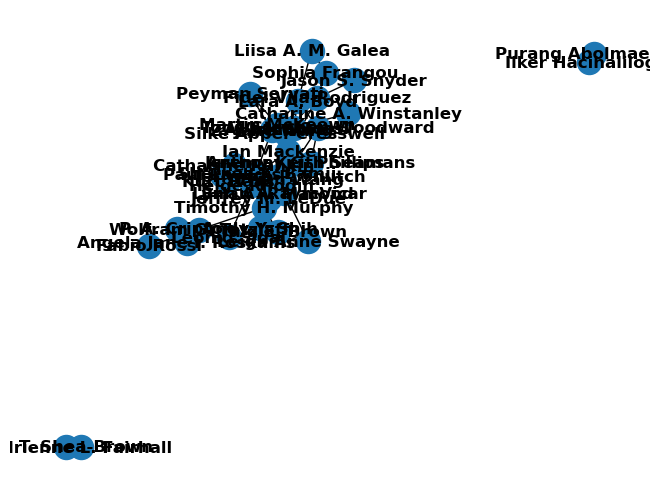

In [72]:
nx.draw(authors_g, with_labels=True, font_weight='bold')
plt.show()

In [74]:
sv_BC_dict = nx.betweenness_centrality(authors_g)
scival_BC_new = [val for key, val in sv_BC_dict.items()]
scival_names = [key for key, val in sv_BC_dict.items()]
print(scival_BC_new)

[0.25971798866535706, 0.02320779426042584, 0.0391666102192418, 0.08423762107972634, 0.10964669122563858, 0.09094869884343572, 0.13655761024182078, 0.005500237079184448, 0.0, 0.050012049354154625, 0.07690041111093743, 0.005339926392557973, 0.07787990419569367, 0.09676955729587311, 0.09244056086161351, 0.006069227121858701, 0.08508172718699034, 0.0, 0.09257473204841625, 0.0, 0.008121655490076542, 0.003640858904016799, 0.047050057576373365, 0.0054528212422949255, 0.019230508704192913, 0.04319511095826886, 0.06642811116495327, 0.00906122287701235, 0.0, 0.0, 0.0, 0.0, 0.004886371333739755, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [7]:
# plt.matshow(scival_coauthor_matrix,cmap="Wistia",norm="linear")
# plt.matshow(gs_coauthor_matrix,cmap="Wistia",norm="linear")
def graph_matrix(df, title):
    coauthor_matrix = get_coauthor_matrix(df)
    names=scival_df["Name"].to_list()

    fig, ax = plt.subplots()
    im = ax.imshow(coauthor_matrix, cmap="YlOrRd")

    # Show all ticks and label them with the respective list entries
    ax.set_xticks(np.arange(len(names)), labels=names, fontsize="xx-small")
    ax.set_yticks(np.arange(len(names)), labels=names, fontsize="xx-small")

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(names)):
        for j in range(len(names)):
            text = ax.text(j, i, int(coauthor_matrix[i, j]),
                        ha="center", va="center", color="black")

    ax.set_title(title)
    fig.tight_layout()
    fig.set_size_inches(10, 10)
    plt.show()

In [13]:
combined_df = pd.read_csv("authors_comparisons_updated2.csv")
scival_coauthor_matrix = get_coauthor_matrix(combined_df, "sv_name", "sv_coauthors")
# scival_coauthor_matrix = get_coauthor_matrix(scival_df, "Name", "Coauthors")
gs_coauthor_matrix = get_coauthor_matrix(combined_df, "gs_name", "gs_coauthors")

scival_coauthor_matrix[scival_coauthor_matrix > 0] = 1
gs_coauthor_matrix[gs_coauthor_matrix > 0] = 1

Annie Vogel Ciernia has no coauthors
Mark S. Cembrowski has no coauthors
Michael D. Gordon has no coauthors
Manu S. Madhav has no coauthors
Brian Fisher has no coauthors
Emily Lauren Sylwestrak has no coauthors
Anthony Randal McIntosh has no coauthors


Michael Gordon has no coauthors
Manu S Madhav has no coauthors
Emily Sylwestrak has no coauthors




In [14]:
print(scival_coauthor_matrix)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [23]:
gs_centrality = bct.betweenness_bin(gs_coauthor_matrix)
gs_centrality_normed = gs_centrality/(((len(gs_coauthor_matrix)-1)*(len(gs_coauthor_matrix)-2))/2)
gs_BC_adjusted = gs_centrality/np.array([data for data in combined_df["gs_count"]])

sv_names = combined_df["sv_name"].tolist()

scival_centrality = bct.betweenness_bin(scival_coauthor_matrix)
scival_centrality_normed = scival_centrality/(((len(scival_coauthor_matrix)-1)*(len(scival_coauthor_matrix)-2))/2)
scival_BC_adjusted = scival_centrality/np.array([data for data in combined_df["sv_count"]])

In [24]:
print(scival_centrality)
print(scival_BC_adjusted)

[365.16349206   0.         154.16324786 129.97142857 109.4991453
  66.15238095  11.41904762  27.03809524  60.73232601   0.
   0.         192.         136.05799756   0.         127.87387057
   6.8702381   70.31694139 119.62490842  32.63015873   0.
   0.           0.           0.           5.11904762   0.
   0.         130.16007326   0.           7.66666667   8.53333333
 108.12197802 118.43809524   0.           0.           7.50793651
   7.73333333   0.           0.           0.           0.
  12.74007937  55.06825397   0.           0.           0.
  93.3979243 ]
[1.97385671 0.         0.92313322 0.80727595 2.48861694 0.30484968
 0.07227245 0.10399267 0.19912238 0.         0.         0.93203883
 0.44318566 0.         0.66600974 0.09814626 0.33806222 0.4242018
 0.21326901 0.         0.         0.         0.         0.04611755
 0.         0.         0.38738117 0.         0.03650794 0.02726305
 2.35047778 2.27765568 0.         0.         0.14165918 0.20350877
 0.         0.         0.      

([<matplotlib.axis.XTick at 0x166e59510>,
 [Text(0, 0, 'Timothy H. Murphy'),
  Text(1, 0, 'Annie Vogel Ciernia'),
  Text(2, 0, 'Brian A. MacVicar'),
  Text(3, 0, 'Fidel Vila-Rodriguez'),
  Text(4, 0, 'Shernaz X. Bamji'),
  Text(5, 0, 'Lara A. Boyd'),
  Text(6, 0, 'Paul Pavlidis'),
  Text(7, 0, 'Martin McKeown'),
  Text(8, 0, 'A. Jon Stoessl'),
  Text(9, 0, 'P. A. Cripton'),
  Text(10, 0, 'Jason S. Snyder'),
  Text(11, 0, 'Wolfram G. Tetzlaff'),
  Text(12, 0, 'Anthony G. Phillips'),
  Text(13, 0, 'Catharine A. Winstanley'),
  Text(14, 0, 'YuTian Wang'),
  Text(15, 0, 'Jeremy Keith Seamans'),
  Text(16, 0, 'Terrance P. Snutch'),
  Text(17, 0, 'Ian Mackenzie'),
  Text(18, 0, 'Lynn A. Raymond'),
  Text(19, 0, 'Kurt Haas'),
  Text(20, 0, 'Mark S. Cembrowski'),
  Text(21, 0, 'Fabio Rossi'),
  Text(22, 0, 'Angela Jane I. Roskams'),
  Text(23, 0, 'Catharine Rankin'),
  Text(24, 0, 'Michael D. Gordon'),
  Text(25, 0, 'Leonid Sigal'),
  Text(26, 0, 'Z. Jane Wang'),
  Text(27, 0, 'Peyman Servati'

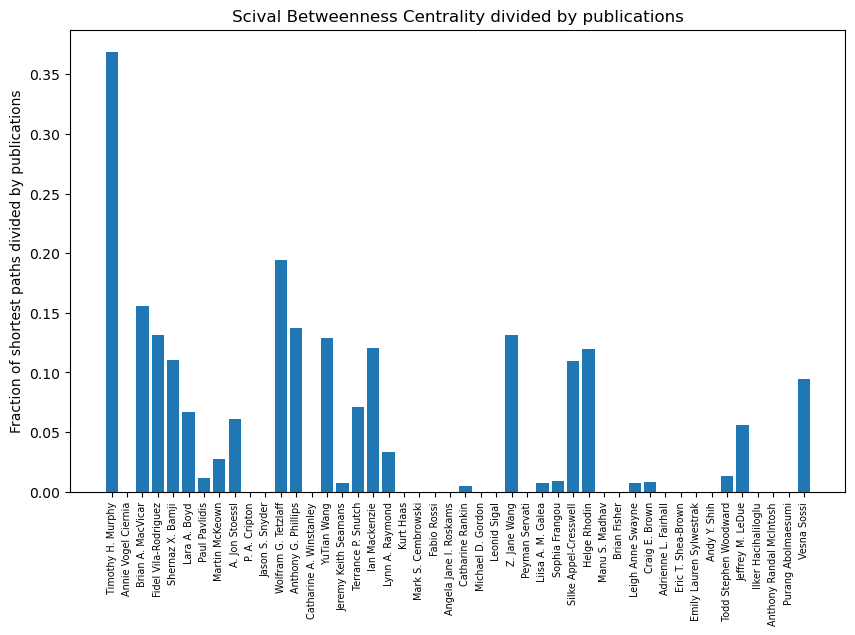

In [25]:
plt.figure(figsize=(10,6))
plt.bar(sv_names, scival_centrality_normed)
plt.title("Scival Betweenness Centrality divided by publications")
plt.ylabel("Fraction of shortest paths divided by publications")
plt.xticks(range(len(sv_names)), labels=sv_names, rotation=90, fontsize='x-small')

# betweenness centrality

In [39]:
#combined dataframe
combined_df = pd.read_csv("authors_comparisons_updated2.csv")

sv_G = get_networkx_matrix(nx.Graph(),combined_df,'sv_name','sv_coauthors')
sv_BC_dict = nx.betweenness_centrality(sv_G)
sv_DC_dict = nx.degree_centrality(sv_G)
sv_BC = [val for key, val in sv_BC_dict.items()]
sv_DC = [val for key, val in sv_DC_dict.items()]
sv_names = [key for key, val in sv_BC_dict.items()]

gs_G = get_networkx_matrix(nx.Graph(),combined_df,'gs_name','gs_coauthors')
gs_BC_dict = nx.betweenness_centrality(gs_G)
gs_DC_dict = nx.betweenness_centrality(gs_G)
gs_DC = [val for key, val in gs_DC_dict.items()]
gs_BC = [val for key, val in gs_BC_dict.items()]
gs_names = [key for key, val in gs_BC_dict.items()]

print(len(sv_G.edges))
print(gs_G)

Annie Vogel Ciernia has no coauthors
Mark S. Cembrowski has no coauthors
Michael D. Gordon has no coauthors
Manu S. Madhav has no coauthors
Brian Fisher has no coauthors
Emily Lauren Sylwestrak has no coauthors
Anthony Randal McIntosh has no coauthors


Michael Gordon has no coauthors
Manu S Madhav has no coauthors
Emily Sylwestrak has no coauthors


80
Graph with 46 nodes and 102 edges


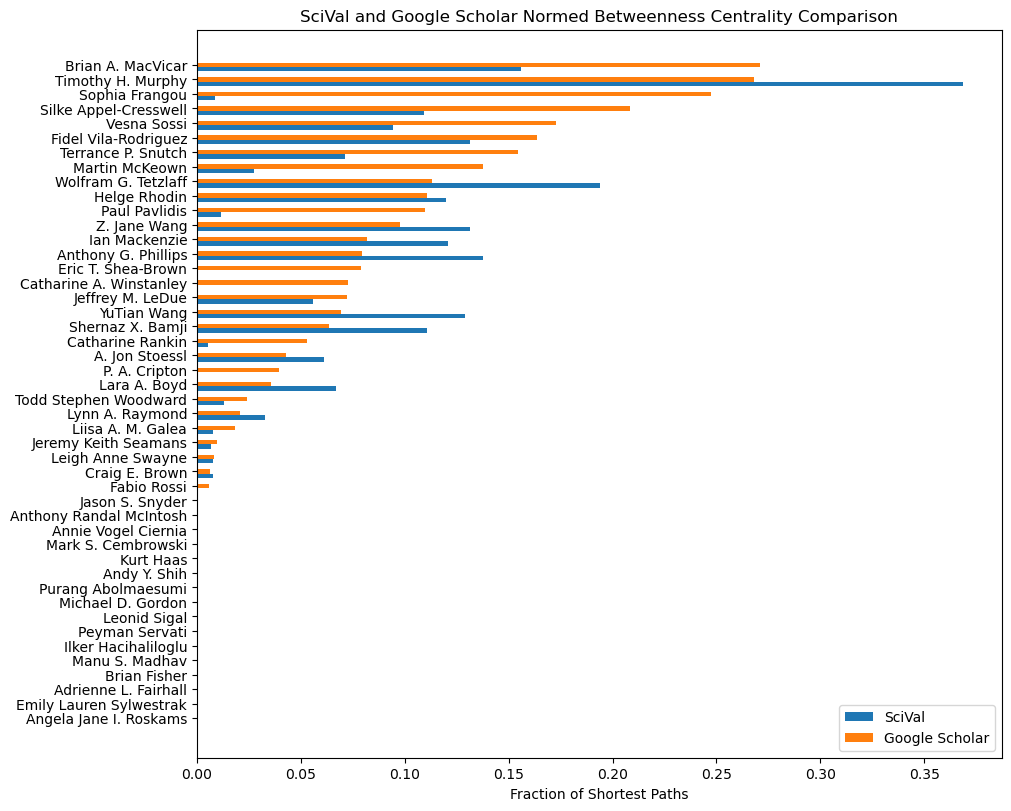

In [27]:

# order the data
centrality_df = pd.DataFrame({
    "Name":sv_names,
    "SciVal":scival_centrality_normed,
    "Google Scholar":gs_centrality_normed,
})

ordered_df = centrality_df.sort_values(by="Google Scholar", ascending=True)

species = ordered_df["Name"].to_list()
penguin_means = {
    'SciVal': ordered_df["SciVal"].to_list(),
    'Google Scholar': ordered_df["Google Scholar"].to_list(),
}

x = np.arange(len(species))  # the label locations
width = 0.3  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

fig.set_size_inches(10, 8)
plt.title("Google Scholar Betweenness Centrality")

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.barh(x + offset, measurement, width, label=attribute)
    # if attribute=="Scival":
    #     ax.bar_label(rects, padding=3, color = "blue")
    # elif attribute=="Google Scholar":
    #     ax.bar_label(rects, padding=3, color = "orange")
    multiplier += 1

ax.set_xlabel("Fraction of Shortest Paths")
ax.set_title('SciVal and Google Scholar Normed Betweenness Centrality Comparison')
ax.set_yticks(x + width, labels=species)
ax.legend(loc='lower right')

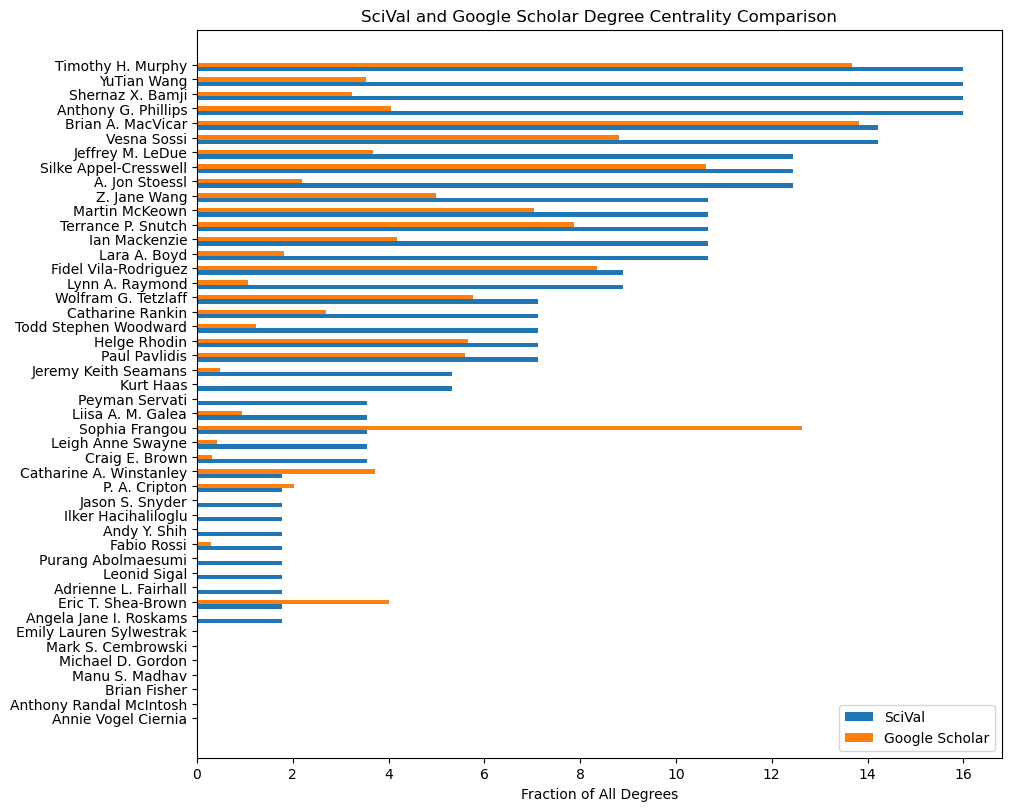

In [40]:
# order the data

sv_DC = np.array(sv_DC)*len(sv_G.edges)
gs_DC = np.array(gs_DC)*len(gs_G.edges)
centrality_df = pd.DataFrame({
    "Name":sv_names,
    "SciVal":sv_DC,
    "Google Scholar":gs_DC,
})

ordered_df = centrality_df.sort_values(by="SciVal", ascending=True)

species = ordered_df["Name"].to_list()
penguin_means = {
    'SciVal': ordered_df["SciVal"].to_list(),
    'Google Scholar': ordered_df["Google Scholar"].to_list(),
}

x = np.arange(len(species))  # the label locations
width = 0.3  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

fig.set_size_inches(10, 8)

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.barh(x + offset, measurement, width, label=attribute)
    # if attribute=="Scival":
    #     ax.bar_label(rects, padding=3, color = "blue")
    # elif attribute=="Google Scholar":
    #     ax.bar_label(rects, padding=3, color = "orange")
    multiplier += 1

ax.set_xlabel("Fraction of All Degrees")
ax.set_title('SciVal and Google Scholar Degree Centrality Comparison')
ax.set_yticks(x + width, labels=species)
ax.legend(loc='lower right')

##invert + run with weighted version
##check out networkx degrees

In [99]:
centrality_df.to_csv("newBC_package_updated2.csv")

In [87]:
#combined dataframe
combined_df = pd.read_csv("authors_comparisons_updated1.csv") 

#get coauthor matrices
scival_coauthor_matrix = get_coauthor_matrix(combined_df, "sv_name", "sv_coauthors")
gs_coauthor_matrix = get_coauthor_matrix(combined_df, "gs_name", "gs_coauthors")

#get relevant arrays to plot
names = combined_df["sv_name"].to_list()

gs_centrality = bct.betweenness_bin(gs_coauthor_matrix)
gs_centrality_normed = gs_centrality/(((len(gs_coauthor_matrix)-1)*(len(gs_coauthor_matrix)-2))/2)
gs_BC_adjusted = gs_centrality/np.array([data for data in combined_df["gs_count"]])

scival_centrality = bct.betweenness_bin(scival_coauthor_matrix)
scival_centrality_normed = scival_centrality/(((len(scival_coauthor_matrix)-1)*(len(scival_coauthor_matrix)-2))/2)
scival_BC_adjusted = scival_centrality/np.array([data for data in combined_df["sv_count"]])

Annie Vogel Ciernia has no coauthors
Mark S. Cembrowski has no coauthors
Michael D. Gordon has no coauthors
Manu S. Madhav has no coauthors
Brian Fisher has no coauthors
Emily Lauren Sylwestrak has no coauthors
Jeffrey M. LeDue has no coauthors
Anthony Randal McIntosh has no coauthors


Michael Gordon has no coauthors
Manu S Madhav has no coauthors
Emily Sylwestrak has no coauthors




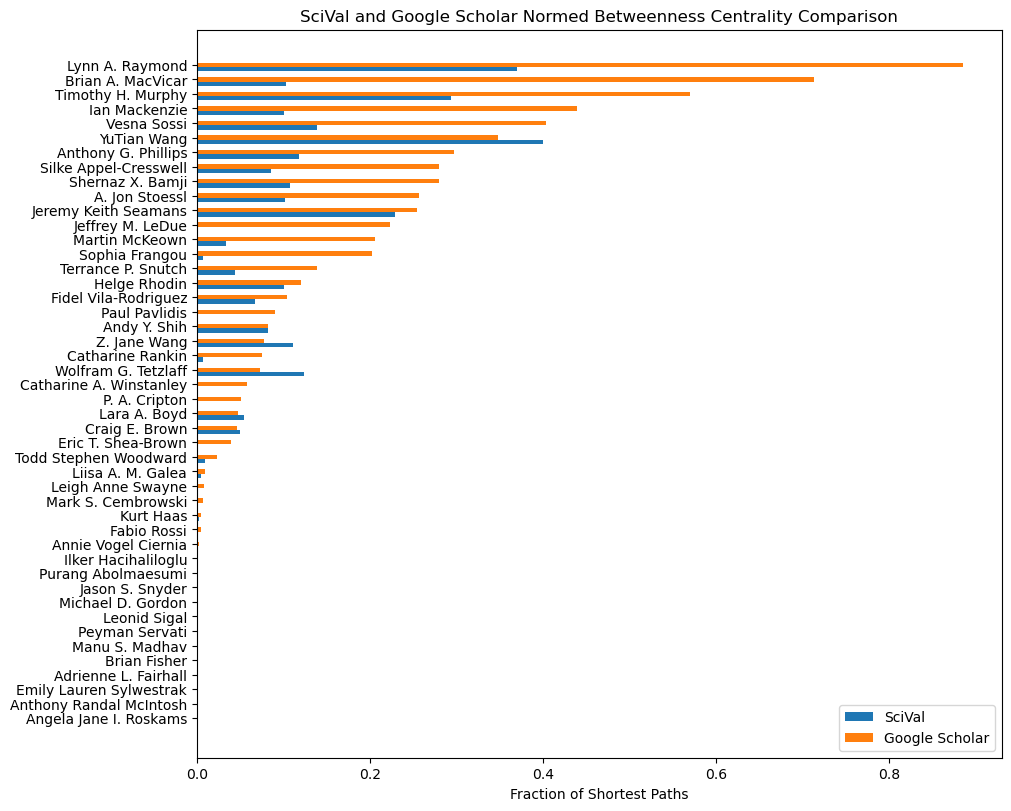

In [29]:
# order the data
centrality_df = pd.DataFrame({
    "Name":names,
    "SciVal":scival_centrality_normed,
    "Google Scholar":gs_centrality_normed,
})

ordered_df = centrality_df.sort_values(by="Google Scholar", ascending=True)

species = ordered_df["Name"].to_list()
penguin_means = {
    'SciVal': ordered_df["SciVal"].to_list(),
    'Google Scholar': ordered_df["Google Scholar"].to_list(),
}

x = np.arange(len(species))  # the label locations
width = 0.3  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

fig.set_size_inches(10, 8)
plt.title("Google Scholar Betweenness Centrality")

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.barh(x + offset, measurement, width, label=attribute)
    # if attribute=="Scival":
    #     ax.bar_label(rects, padding=3, color = "blue")
    # elif attribute=="Google Scholar":
    #     ax.bar_label(rects, padding=3, color = "orange")
    multiplier += 1

ax.set_xlabel("Fraction of Shortest Paths")
ax.set_title('SciVal and Google Scholar Normed Betweenness Centrality Comparison')
ax.set_yticks(x + width, labels=species)
ax.legend(loc='lower right')

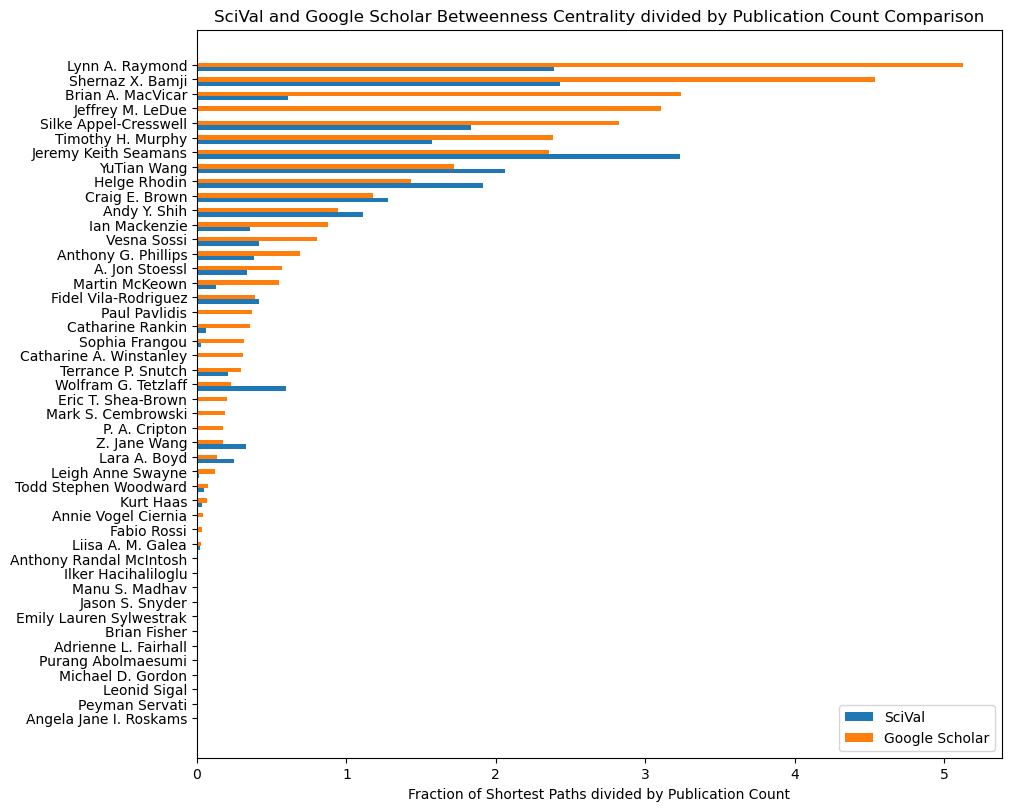

In [30]:
centrality_df_adjusted = pd.DataFrame({
    "Name":names,
    "SciVal":scival_BC_adjusted,
    "Google Scholar":gs_BC_adjusted,
})

ordered_df_unadjusted = centrality_df_adjusted.sort_values(by="Google Scholar", ascending=True)
# print(ordered_df_unadjusted.head)

species = ordered_df_unadjusted["Name"].to_list()
penguin_means = {
    'SciVal': ordered_df_unadjusted["SciVal"].to_list(),
    'Google Scholar': ordered_df_unadjusted["Google Scholar"].to_list(),
}

x = np.arange(len(species))  # the label locations
width = 0.3  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

fig.set_size_inches(10, 8)
plt.title("Google Scholar Betweenness Centrality")

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.barh(x + offset, measurement, width, label=attribute)
    # if attribute=="Scival":
    #     ax.bar_label(rects, padding=3, color = "blue")
    # elif attribute=="Google Scholar":
    #     ax.bar_label(rects, padding=3, color = "orange")
    multiplier += 1

ax.set_xlabel("Fraction of Shortest Paths divided by Publication Count")
ax.set_title('SciVal and Google Scholar Betweenness Centrality divided by Publication Count Comparison')
ax.set_yticks(x + width, labels=species)
ax.legend(loc='lower right')

# degrees comparison

<bound method NDFrame.head of                        Name  SciVal  Google Scholar
38  Emily Lauren Sylwestrak     0.0             0.0
32           Manu S. Madhav     0.0             0.0
24        Michael D. Gordon     0.0             0.0
22   Angela Jane I. Roskams     1.0             1.0
39             Andy Y. Shih     1.0             1.0
36     Adrienne L. Fairhall     1.0             1.0
33             Brian Fisher     0.0             1.0
25             Leonid Sigal     1.0             1.0
44       Purang Abolmaesumi     1.0             1.0
10          Jason S. Snyder     1.0             1.0
42      Ilker Hacihaliloglu     1.0             1.0
1       Annie Vogel Ciernia     0.0             1.0
43  Anthony Randal McIntosh     0.0             1.0
21              Fabio Rossi     1.0             2.0
37       Eric T. Shea-Brown     1.0             2.0
35           Craig E. Brown     2.0             2.0
34        Leigh Anne Swayne     2.0             2.0
27           Peyman Servati     2.

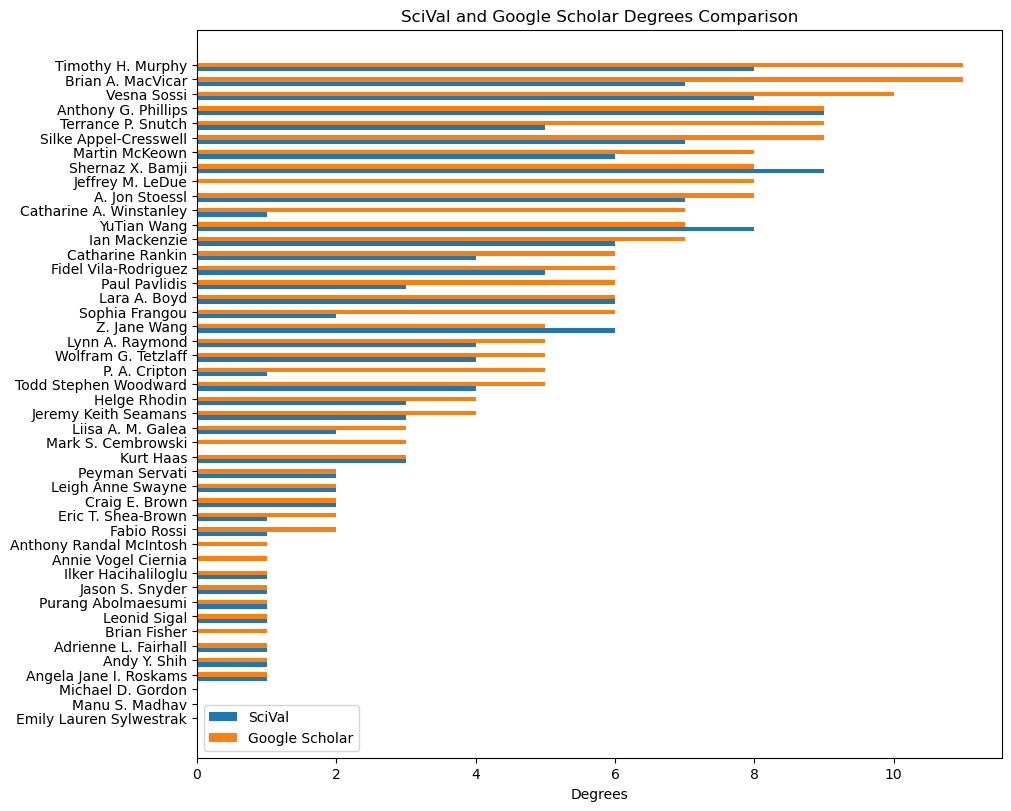

In [31]:
degree_df = pd.DataFrame({
    "Name":combined_df["sv_name"].to_list(),
    "SciVal":combined_df["sv_degree"].to_list(),
    "Google Scholar":combined_df["gs_degree"].to_list(),
})

ordered_df = degree_df.sort_values(by="Google Scholar", ascending=True)
print(ordered_df.head)

species = ordered_df["Name"].to_list()
penguin_means = {
    'SciVal': ordered_df["SciVal"].to_list(),
    'Google Scholar': ordered_df["Google Scholar"].to_list(),
}

x = np.arange(len(species))  # the label locations
width = 0.3  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

fig.set_size_inches(10, 8)
plt.title("Google Scholar Degrees")

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.barh(x + offset, measurement, width, label=attribute)
    # if attribute=="Scival":
    #     ax.bar_label(rects, padding=3, color = "blue")
    # elif attribute=="Google Scholar":
    #     ax.bar_label(rects, padding=3, color = "orange")
    multiplier += 1

ax.set_xlabel("Degrees")
ax.set_title('SciVal and Google Scholar Degrees Comparison')
ax.set_yticks(x + width, labels=species)
ax.legend()